<a href="https://colab.research.google.com/github/Inkizhekov/My-todo-do/blob/main/%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_hiererchical_clustering_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_DBSCAN_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%A7_1%2C_%D0%A7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt


In [202]:
# Задаем массив

X = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1],
              [2, 1],
              [2, 2],
              [3, 2],
              [6, 6],
              [7, 6],
              [8, 6],
              [6, 7],
              [7, 7],
              [8, 7],
              [9, 7],
              [7, 8],
              [8, 8],
              [9, 8],
              [8, 9],
              [9, 9],])

In [203]:
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [2, 2],
       [3, 2],
       [6, 6],
       [7, 6],
       [8, 6],
       [6, 7],
       [7, 7],
       [8, 7],
       [9, 7],
       [7, 8],
       [8, 8],
       [9, 8],
       [8, 9],
       [9, 9]])

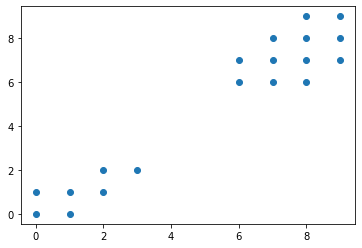

In [204]:
plt.scatter(X[:,0], X[:,1])

In [205]:
from sklearn.cluster import DBSCAN

In [206]:
dbcluster = DBSCAN(eps=4, min_samples=3).fit(X)

In [207]:
dblabels = dbcluster.labels_

In [208]:
dblabels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

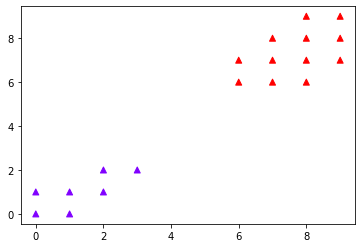

In [209]:
plt.scatter(X[:,0], X[:,1], c=dblabels, marker= '^', cmap='rainbow')

In [210]:
from sklearn import datasets

In [211]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

In [212]:
noisy_circles

(array([[-0.40840347,  0.25811801],
        [-0.87293272,  0.36639064],
        [-0.14695352, -0.97728506],
        ...,
        [-0.49771732,  0.83856836],
        [-0.24454217, -0.31969184],
        [-0.51474148,  0.06147602]]), array([1, 0, 0, ..., 0, 1, 1]))

In [213]:
n_cir = noisy_circles[0]

from sklearn.preprocessing import StandardScaler

n_cir = StandardScaler().fit_transform(n_cir)

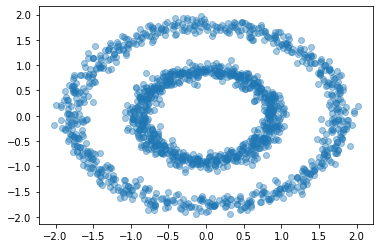

In [214]:
plt.scatter(n_cir[:, 0], n_cir[:,1], alpha = 0.4)


In [215]:
from sklearn.cluster import KMeans

In [216]:
K_means = KMeans(n_clusters = 2).fit(n_cir)

In [217]:
print (K_means.labels_)

[0 0 1 ... 0 1 0]


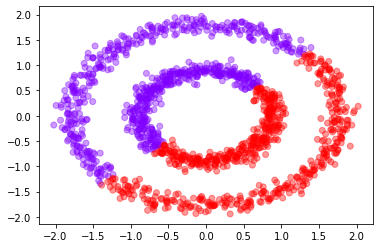

In [218]:
plt.scatter(n_cir[:, 0], n_cir[:,1], c = K_means.labels_, marker = 'o', cmap= 'rainbow', alpha = 0.4)

<function matplotlib.pyplot.show(*args, **kw)>

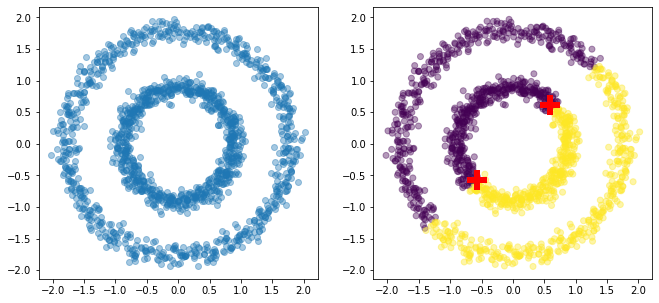

In [219]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_cir[:,0], n_cir[:,1], alpha=.4)
axes[1].scatter(n_cir[:,0], n_cir[:,1], c = K_means.labels_, alpha=.4)
axes[1].scatter(K_means.cluster_centers_[:, 0], K_means.cluster_centers_[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [220]:
dbclusters_cir = DBSCAN(eps=0.3, min_samples=5).fit(n_cir)

In [221]:
dblables_cir = dbclusters_cir.labels_
dblables_cir

array([0, 1, 1, ..., 1, 0, 0])

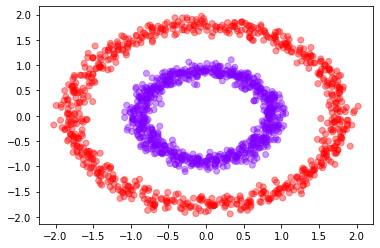

In [222]:
plt.scatter(n_cir[:, 0], n_cir[:,1], c = dblables_cir, marker = 'o', cmap='rainbow', alpha = 0.4)

<function matplotlib.pyplot.show(*args, **kw)>

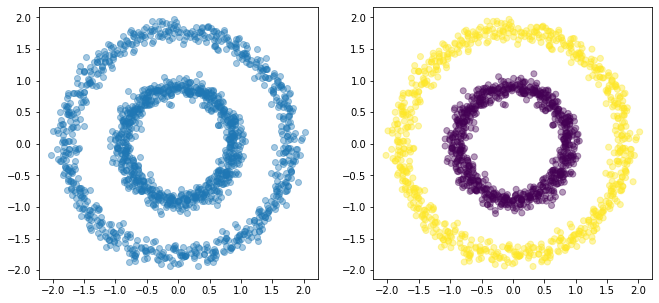

In [223]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_cir[:,0], n_cir[:,1], alpha=.4)
axes[1].scatter(n_cir[:,0], n_cir[:,1], c = dblables_cir, alpha=.4)
#axes[1].scatter(K_means.cluster_centers_[:, 0], K_means.cluster_centers_[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [224]:
pip install fuzzy-c-means


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [225]:
from fcmeans import FCM

In [226]:
fcm_cir = FCM(n_clusters=2)
fcm_cir.fit(n_cir)

In [227]:
fcm_cir_centres = fcm_cir.centers
fcm_cir_labels = fcm_cir.predict(n_cir)

In [228]:
fcm_cir_centres

array([[ 0.61957844, -0.51158862],
       [-0.61817345,  0.50960042]])

<function matplotlib.pyplot.show(*args, **kw)>

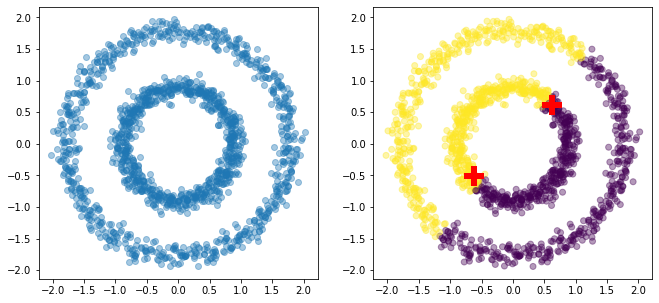

In [229]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_cir[:,0], n_cir[:,1], alpha=.4)
axes[1].scatter(n_cir[:,0], n_cir[:,1], c = fcm_cir_labels, alpha=.4)
axes[1].scatter(fcm_cir_centres[:, 0], fcm_cir_centres[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [230]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

In [231]:
noisy_moons

(array([[ 0.164673  , -0.2094643 ],
        [ 0.96846643,  0.3877902 ],
        [ 1.48753807, -0.39725786],
        ...,
        [-0.31441333,  1.00379588],
        [-0.46517404,  0.83779687],
        [ 0.72077405,  0.81776348]]), array([1, 0, 1, ..., 0, 0, 0]))

In [232]:
n_moon = noisy_moons[0]

from sklearn.preprocessing import StandardScaler
n_moon = StandardScaler().fit_transform(n_moon)

In [233]:
n_moon

array([[-0.38570275, -0.9272109 ],
       [ 0.54036413,  0.27445793],
       [ 1.13839719, -1.30504928],
       ...,
       [-0.93766792,  1.51385392],
       [-1.11136242,  1.17986592],
       [ 0.25499265,  1.13955896]])

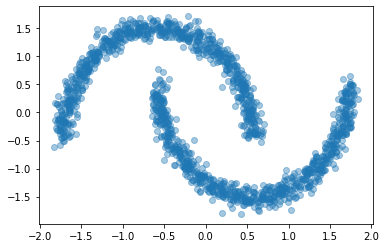

In [234]:
plt.scatter(n_moon[:, 0], n_moon[:, 1], alpha = 0.4)

In [235]:
dbcluster_moon1 = DBSCAN(eps=0.3).fit(n_moon)
dblabels_moon1 = dbcluster_moon1.labels_
dblabels_moon1

array([0, 1, 0, ..., 1, 1, 1])

<function matplotlib.pyplot.show(*args, **kw)>

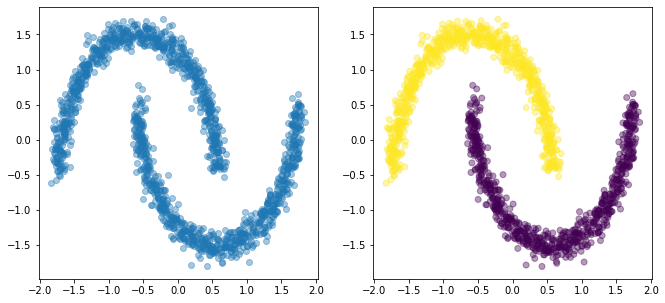

In [236]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_moon[:,0], n_moon[:,1], alpha=.4)
axes[1].scatter(n_moon[:,0], n_moon[:,1], c = dblabels_moon1, alpha=.4)
#axes[1].scatter(fcm_cir_centres[:, 0], fcm_cir_centres[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [237]:
K_means1 = KMeans(n_clusters = 2).fit(n_moon)

<function matplotlib.pyplot.show(*args, **kw)>

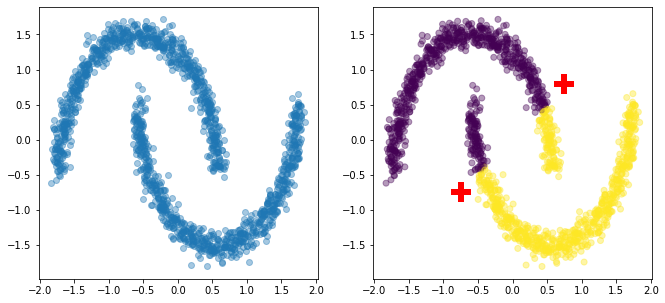

In [238]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_moon[:,0], n_moon[:,1], alpha=.4)
axes[1].scatter(n_moon[:,0], n_moon[:,1], c = K_means1.labels_, alpha=.4)
axes[1].scatter(K_means1.cluster_centers_[:, 0], K_means1.cluster_centers_[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

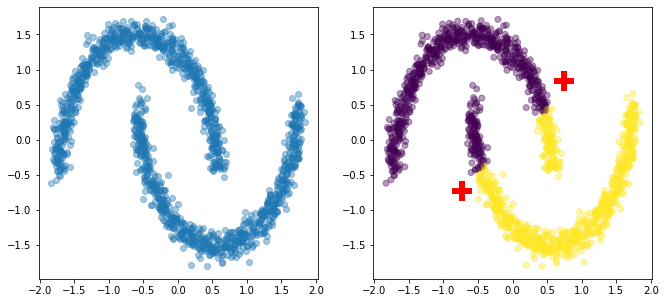

In [239]:
fcm_moon = FCM(n_clusters=2)
fcm_moon.fit(n_moon)
fcm_moon_centres = fcm_moon.centers
fcm_moon_labels = fcm_moon.predict(n_moon)
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(n_moon[:,0], n_moon[:,1], alpha=.4)
axes[1].scatter(n_moon[:,0], n_moon[:,1], c = fcm_moon_labels, alpha=.4)
axes[1].scatter(fcm_moon_centres[:, 0], fcm_moon_centres[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [240]:
np.random.seed(0)
random_state =3
blobs = datasets.make_blobs(n_samples=n_samples, cluster_std = [0.5, 1.0, 1.5], random_state=random_state)

b1 = blobs[0]
from sklearn.preprocessing import StandardScaler
b1 = StandardScaler().fit_transform(b1)

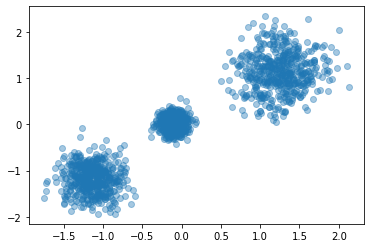

In [241]:
plt.scatter(b1[:, 0], b1[:,1], alpha= 0.4)

In [242]:
dbcluster_b1 = DBSCAN(eps=0.2).fit(b1)
dblabels_b1 = dbcluster_b1.labels_
dblabels_b1

array([-1,  0,  1, ...,  1,  1,  1])

<function matplotlib.pyplot.show(*args, **kw)>

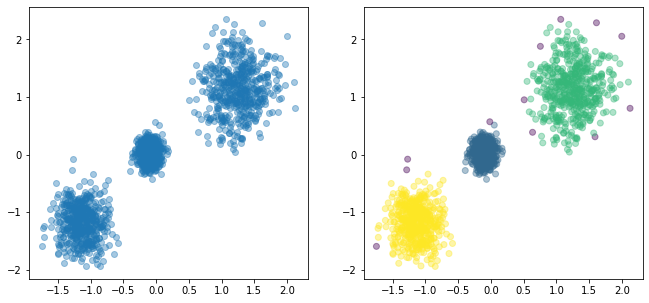

In [243]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(b1[:,0], b1[:,1], alpha=.4)
axes[1].scatter(b1[:,0], b1[:,1], c = dblabels_b1, alpha=.4)
#axes[1].scatter(fcm_moon_centres[:, 0], fcm_moon_centres[: 1], marker = '+', color = 'red', linewidth = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

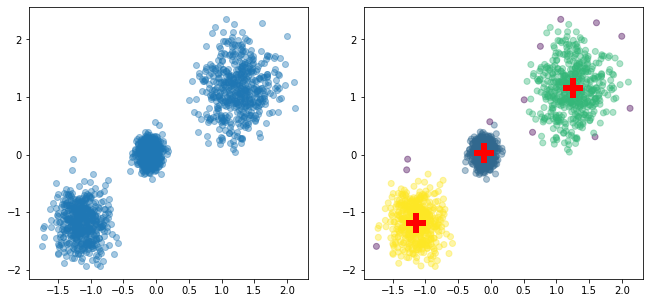

In [244]:
K_means2 = KMeans(n_clusters = 3).fit(b1)
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(b1[:,0], b1[:,1], alpha=.4)
axes[1].scatter(b1[:,0], b1[:,1], c = dblabels_b1, alpha=.4)
axes[1].scatter(K_means2.cluster_centers_[:, 0], K_means2.cluster_centers_[:, 1], marker = '+', color = 'red', linewidth = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

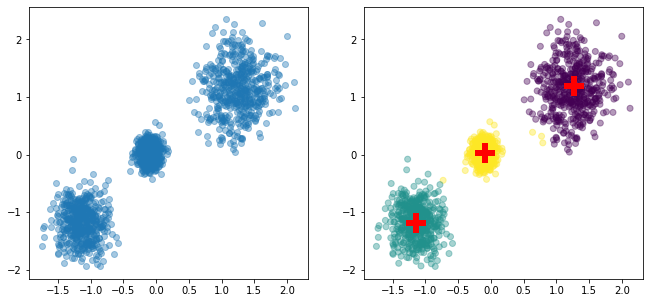

In [245]:
fcm_b1 = FCM(n_clusters=3)
fcm_b1.fit(b1)
fcm_b1_centres = fcm_b1.centers
fcm_b1_labels = fcm_b1.predict(b1)
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(b1[:,0], b1[:,1], alpha=.4)
axes[1].scatter(b1[:,0], b1[:,1], c = fcm_b1_labels, alpha=.4)
axes[1].scatter(fcm_b1_centres[:, 0], fcm_b1_centres[:, 1], marker = '+', color = 'red', linewidth = 20)
plt.show

In [246]:
from sklearn.cluster import AgglomerativeClustering

In [247]:
AG_clustering_1 = AgglomerativeClustering(n_clusters=2, linkage='average').fit(n_cir)
#Метод полной связи - complete linkage (метод "дальнего соседа")
AG_clustering_2 = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(n_cir)
#Метод одиночной связи - single linkage (метод "ближнего соседа")
AG_clustering_3 = AgglomerativeClustering(n_clusters=2, linkage='single').fit(n_cir)
#Метод Уорда
AG_clustering_4 = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(n_cir)

<function matplotlib.pyplot.show(*args, **kw)>

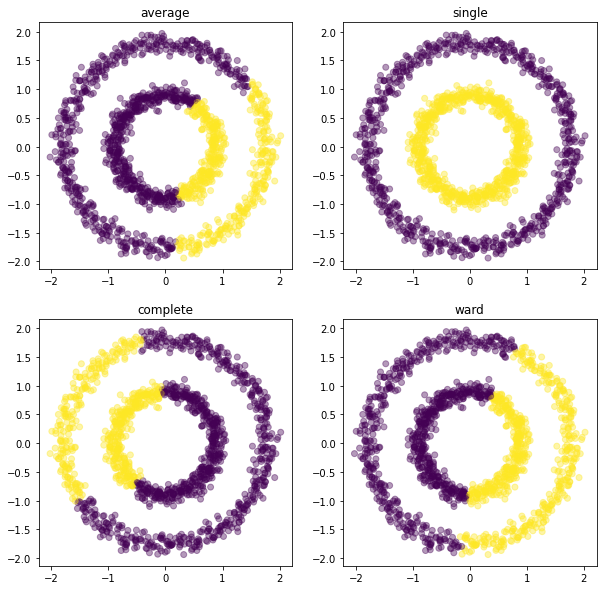

In [248]:
f, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0, 0].set_title('average')
axes[1, 0].set_title('complete')
axes[0, 1].set_title('single')
axes[1, 1].set_title('ward')
axes[0, 0].scatter(n_cir[:,0], n_cir[:,1], c=AG_clustering_1.labels_, alpha=0.4)
axes[1, 0].scatter(n_cir[:,0], n_cir[:,1], c=AG_clustering_2.labels_, alpha=0.4)
axes[0, 1].scatter(n_cir[:,0], n_cir[:,1], c=AG_clustering_3.labels_, alpha=0.4)
axes[1, 1].scatter(n_cir[:,0], n_cir[:,1], c=AG_clustering_4.labels_, alpha=0.4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

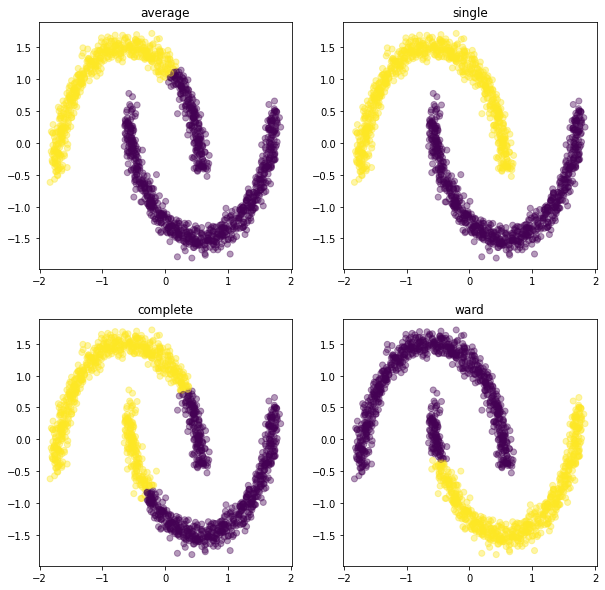

In [251]:
AG_clustering_5 = AgglomerativeClustering(n_clusters=2, linkage='average').fit(n_moon)
#Метод полной связи - complete linkage (метод "дальнего соседа")
AG_clustering_6 = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(n_moon)
#Метод одиночной связи - single linkage (метод "ближнего соседа")
AG_clustering_7 = AgglomerativeClustering(n_clusters=2, linkage='single').fit(n_moon)
#Метод Уорда
AG_clustering_8 = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(n_moon)

f, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0, 0].set_title('average')
axes[1, 0].set_title('complete')
axes[0, 1].set_title('single')
axes[1, 1].set_title('ward')
axes[0, 0].scatter(n_moon[:,0], n_moon[:,1], c=AG_clustering_5.labels_, alpha=0.4)
axes[1, 0].scatter(n_moon[:,0], n_moon[:,1], c=AG_clustering_6.labels_, alpha=0.4)
axes[0, 1].scatter(n_moon[:,0], n_moon[:,1], c=AG_clustering_7.labels_, alpha=0.4)
axes[1, 1].scatter(n_moon[:,0], n_moon[:,1], c=AG_clustering_8.labels_, alpha=0.4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

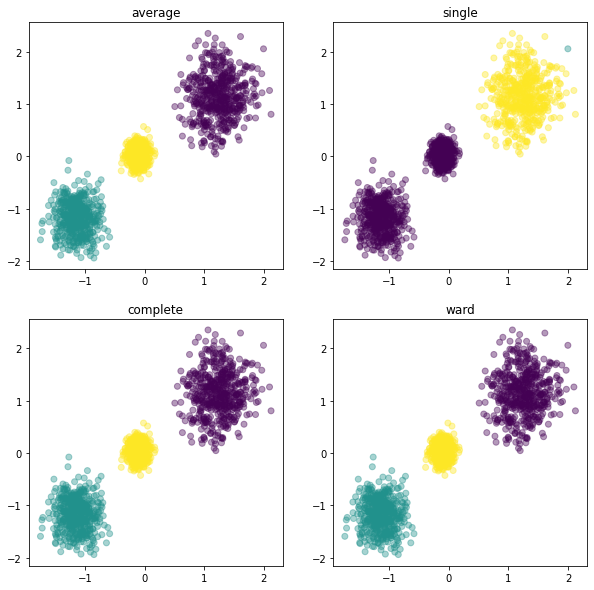

In [253]:
AG_clustering_9 = AgglomerativeClustering(n_clusters=3, linkage='average').fit(b1)
#Метод полной связи - complete linkage (метод "дальнего соседа")
AG_clustering_10 = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(b1)
#Метод одиночной связи - single linkage (метод "ближнего соседа")
AG_clustering_11 = AgglomerativeClustering(n_clusters=3, linkage='single').fit(b1)
#Метод Уорда
AG_clustering_12 = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(b1)

f, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0, 0].set_title('average')
axes[1, 0].set_title('complete')
axes[0, 1].set_title('single')
axes[1, 1].set_title('ward')
axes[0, 0].scatter(b1[:,0], b1[:,1], c=AG_clustering_9.labels_, alpha=0.4)
axes[1, 0].scatter(b1[:,0], b1[:,1], c=AG_clustering_10.labels_, alpha=0.4)
axes[0, 1].scatter(b1[:,0], b1[:,1], c=AG_clustering_11.labels_, alpha=0.4)
axes[1, 1].scatter(b1[:,0], b1[:,1], c=AG_clustering_12.labels_, alpha=0.4)
plt.show

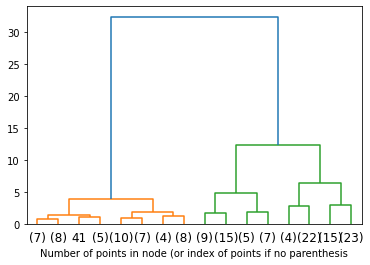

In [265]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
  # Create linkage matrix and then plot the dendrogram

  # create the countas of samples under each node
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1 #leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

  # Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)

iris = load_iris()
X = iris.data

# setting distance_threshould=0 ensures we compute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
#plot the top three levels of the dendrogramm
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of points if no parenthesis")
plt.show()

